# CAPSTONE PROJECT: Segment the audience of a content app based on its user’s propensity to watch a video in the next 2
days
Group 4: Clyde M, Krupa S, Pranav N, Rushabh M,Rajesh B
Date: 02/03/2019 -  17/03/2019


In [60]:
#Libraraies used
import os
os.getcwd()
os.chdir("F:\Rajesh\GreyAtom\Capstone\Data")
os.getcwd()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [61]:
df1 = pd.read_csv('AppLaunched.csv')
df2 = pd.read_csv('AppUninstalled.csv')
df3 = pd.read_csv('Registration.csv')
df4 = pd.read_csv('UTMVisited.csv')
df5 = pd.read_csv('VideoDetails.csv')
df6 = pd.read_csv('VideoStarted.csv')

# df1 = df.copy()

In [62]:
df1.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,a27134c322d4f56dabc106a6847cb96b,20170106,0,4,50,1,1,2
1,aab39ad0874c59cc388525d511667f9d,20170106,0,8,40,1,1,2
2,f717dc3f757dc18cc0c3f27ed3e94ef8,20170106,0,12,35,1,1,2
3,04c1e14fd54a06c0d4fe98cf0cb8b04c,20170106,0,20,40,1,2,2
4,71f05822bb699a04b694dd30265fdf73,20170106,0,20,35,1,1,2


In [63]:
df1.shape

(2716093, 8)

In [64]:
df2.shape

(326684, 8)

In [65]:
df3.shape

(329579, 9)

In [66]:
df4.shape

(495850, 8)

In [67]:
df5.shape

(3695451, 12)

In [68]:
df6.shape

(1796525, 12)

In [69]:
df2.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,20170106,0,0,47,1,1,1
1,807018f66aba113be576eb8afa4ea4b6,20170106,0,0,6,1,1,1
2,763e66e04918d8b8a7e69a778f5a742a,20170106,1,0,41,1,1,1
3,4ee1ed456fa04fc42168a9787b54b549,20170106,1,0,37,1,1,1
4,253e758a5557f9de890e814d901f6906,20170106,6,0,46,40,1,1


In [70]:
df3.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,Status
0,d168e2b924124feaad13eae44a68fce9,20170106,0,8,35,1,1,2,Complete
1,deed7490952a6746610ee2ee9fd219b7,20170106,0,8,7,40,1,1,Completed
2,13d9f55e297d7d9c219fbe9085e1006c,20170106,0,28,35,1,1,2,Complete
3,fccc2c0abf5afabf242a70df7b4c9e69,20170106,0,52,39,1,1,1,Completed
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,0,52,38,1,1,1,Not Completed


In [71]:
df4.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,66d4abf4f3b733c27591b3f47c85eff7,20170106,0,52,37,1,1,1
1,1a40d7e5b34131b097fac80cf982241b,20170106,0,56,40,1,1,1
2,b7b3c1ce773a13b52d39429e305ea615,20170106,1,16,35,1,1,1
3,3f486a89433a02b96ab13b16c82e39fd,20170106,1,32,35,1,1,1
4,9ff982b29d78cefc8eb5a3ffb7fd2a5d,20170106,1,32,38,1,1,1


In [72]:
df5.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,dc93d200565e5bf6e6fc55adb1c5ba06,20170106,0,4,35,Drama,vod,TV Shows,1,2,1,1f2dc23e0d2415353982cfa38cbaf983
1,12060efd8b68ea562b265d0129a8af1f,20170106,0,16,35,Horror,vod,Movies,1,1,1,6c95441f239cebf9930ac5932cc84a7f
2,9151ab2a901458f27e36548d4a8dc011,20170106,0,20,0,Drama,vod,TV Shows,255,1,1,1af000794c63fa2722e22af609ff572c
3,1faf0ce0b98e02e1568702f516f01a78,20170106,0,20,35,Drama,vod,TV Shows,1,1,1,f053c42e98d50e06532ce8d65afb3ab3
4,435d41ae019cb8db785483793859c9a8,20170106,0,20,35,Anime,vod,TV Shows,1,1,1,2a9d984659afc14f801548dd71ddad0e


In [73]:
df6.head()

,UserId,Date,Minute_Of_Day,Second,State,Genre,Category,ProgramType,Country,Device,OS,VideoId
0,0280dfdd112732a3ac12b12dc770b7af,20170106,0,8,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94
1,435d41ae019cb8db785483793859c9a8,20170106,0,28,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c
2,1faf0ce0b98e02e1568702f516f01a78,20170106,0,36,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53
3,3ec691b9d2b5d53ef965fe59b1900b30,20170106,0,48,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546
4,ff230d487a7139b65f33b54a4cbd2d9e,20170106,0,56,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39


In [74]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716093 entries, 0 to 2716092
Data columns (total 8 columns):
UserId           object
Date             int64
Minute_Of_Day    int64
Second           int64
State            int64
Country          int64
Device           int64
OS               int64
dtypes: int64(7), object(1)
memory usage: 165.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326684 entries, 0 to 326683
Data columns (total 8 columns):
UserId           326684 non-null object
Date             326684 non-null int64
Minute_Of_Day    326684 non-null int64
Second           326684 non-null int64
State            326684 non-null int64
Country          326684 non-null int64
Device           326684 non-null int64
OS               326684 non-null int64
dtypes: int64(7), object(1)
memory usage: 19.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329579 entries, 0 to 329578
Data columns (total 9 columns):
UserId           329579 non-null object
Date             329579 non

In [75]:
df2.shape              ## AppUninstalled df

(326684, 8)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326684 entries, 0 to 326683
Data columns (total 8 columns):
UserId           326684 non-null object
Date             326684 non-null int64
Minute_Of_Day    326684 non-null int64
Second           326684 non-null int64
State            326684 non-null int64
Country          326684 non-null int64
Device           326684 non-null int64
OS               326684 non-null int64
dtypes: int64(7), object(1)
memory usage: 19.9+ MB


In [77]:
df2.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,20170106,0,0,47,1,1,1
1,807018f66aba113be576eb8afa4ea4b6,20170106,0,0,6,1,1,1
2,763e66e04918d8b8a7e69a778f5a742a,20170106,1,0,41,1,1,1
3,4ee1ed456fa04fc42168a9787b54b549,20170106,1,0,37,1,1,1
4,253e758a5557f9de890e814d901f6906,20170106,6,0,46,40,1,1


In [78]:
df2.describe()

,Date,Minute_Of_Day,Second,State,Country,Device,OS
count,3.266840e+05,326684.000000,326684.0,326684.000000,326684.000000,326684.000000,326684.000000
mean,2.017035e+07,357.310704,0.0,41.461327,40.816655,1.044768,1.040675
std,1.648711e+02,401.987829,0.0,37.381092,78.878149,0.232493,0.217172
min,2.017011e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.017021e+07,138.000000,0.0,33.000000,1.000000,1.000000,1.000000
50%,2.017040e+07,157.000000,0.0,35.000000,1.000000,1.000000,1.000000
75%,2.017051e+07,178.000000,0.0,43.000000,40.000000,1.000000,1.000000
max,2.017061e+07,1439.000000,0.0,252.000000,255.000000,3.000000,2.000000


In [80]:
df2['TimeStamp']= df2["Date"].astype(str)+" "+(df2['Minute_Of_Day']//60).astype(str) +":"+ (df2['Minute_Of_Day']%60).astype(str)+ ":"+df2["Second"].astype(str)

In [81]:
df2['TimeStamp']=pd.to_datetime(df2["TimeStamp"],format="%Y%m%d %H:%M:%S")
print (df2["TimeStamp"])

0        2017-01-06 00:00:00
1        2017-01-06 00:00:00
2        2017-01-06 00:01:00
3        2017-01-06 00:01:00
4        2017-01-06 00:06:00
5        2017-01-06 00:06:00
6        2017-01-06 00:11:00
7        2017-01-06 00:16:00
8        2017-01-06 00:20:00
9        2017-01-06 00:21:00
10       2017-01-06 00:25:00
11       2017-01-06 00:25:00
12       2017-01-06 00:26:00
13       2017-01-06 00:26:00
14       2017-01-06 00:26:00
15       2017-01-06 00:31:00
16       2017-01-06 00:31:00
17       2017-01-06 00:32:00
18       2017-01-06 00:32:00
19       2017-01-06 00:36:00
20       2017-01-06 00:36:00
21       2017-01-06 00:40:00
22       2017-01-06 00:41:00
23       2017-01-06 00:51:00
24       2017-01-06 00:56:00
25       2017-01-06 00:56:00
26       2017-01-06 01:10:00
27       2017-01-06 01:16:00
28       2017-01-06 01:25:00
29       2017-01-06 01:26:00
                 ...        
326654   2017-06-12 20:50:00
326655   2017-06-12 20:50:00
326656   2017-06-12 20:50:00
326657   2017-

In [82]:
df2["UserId"].value_counts()

93d087d8b7df56f94b963367c640d557    41
64baef3964258bdead9ed9e4a1df84dc    31
ebaed4942c8e92e124afbad8720e7021    20
00777fb8db3ca4b63736934f698d905e    19
931edc94a53bddd1ad54759242b6c19c    18
0b445f6734eefd6aa64f6105483a125a    15
440c2f12c55eb7c7820c2037418f90bd    15
ef3d7377c10cfe597514c73add1b30dc    15
2da4c29fb71b621cda36869438fc26a0    15
da5c3eab416cae91ff0e021e645f7306    15
e7b7fd77552426bb8b261f8ab40b5fc9    14
c52d61fe763740431a2cc570f5f021b5    13
7001bac626aa56d8e3484cf31df73d33    12
217988f3d36598b8e3ac322bc843cff5    11
508ceae32bea973932d9763692428ba7    11
5846121f142914dbc7a4ca3febcc39d1    11
aec04d9d26aff5efef5bb216a99c623d    11
6eb0f96a70ad71988410fff1f6e218bd    11
e9e0f439053efa5267bee719721e2b63    11
5647748313f30f1066ff7d0b9924fa3a    10
39e952b8086283a711c5d677dafd92bb    10
656c9f94f6313c31458a37d1a45d513f    10
446078520189123d49b2372d72382f1d     9
6ee65997f29ce0f4a09885a2cb5437ec     9
fb1faaf0149c25badda54ca916163a11     9
7f4dbc849f15c79036364898e

In [83]:
df2["Date"].value_counts()

20170122    3288
20170605    3265
20170607    3160
20170522    3065
20170124    3059
20170123    2992
20170425    2975
20170201    2931
20170504    2925
20170507    2911
20170121    2878
20170119    2854
20170130    2832
20170502    2805
20170125    2802
20170127    2789
20170508    2752
20170120    2736
20170506    2725
20170126    2724
20170128    2709
20170118    2706
20170430    2684
20170131    2670
20170115    2665
20170603    2651
20170428    2638
20170129    2626
20170423    2625
20170509    2614
            ... 
20170220    1409
20170317    1406
20170310    1397
20170314    1395
20170305    1392
20170330    1387
20170303    1385
20170311    1381
20170227    1376
20170319    1373
20170404    1372
20170331    1370
20170402    1370
20170320    1367
20170316    1367
20170308    1362
20170307    1352
20170318    1343
20170306    1342
20170401    1322
20170309    1305
20170228    1293
20170221    1287
20170223    1279
20170321    1234
20170302    1207
20170323    1202
20170301    11

In [84]:
df2["Minute_Of_Day"].value_counts()

178     9922
132     9440
174     9315
142     9090
124     8141
151     7583
131     7176
123     7030
1200    6651
155     6631
159     6474
141     6458
145     6426
121     6132
138     5832
150     5654
153     5477
122     5419
163     5226
136     5060
139     5038
161     4918
156     4805
600     4766
157     4499
172     4386
176     4370
166     4336
164     4187
173     4177
        ... 
859        1
1299       1
899        1
1029       1
929        1
964        1
794        1
959        1
14         1
734        1
699        1
954        1
1249       1
1204       1
422        1
1189       1
668        1
1149       1
658        1
49         1
306        1
390        1
54         1
389        1
210        1
643        1
1004       1
749        1
894        1
1279       1
Name: Minute_Of_Day, Length: 1140, dtype: int64

In [85]:
df2["Second"].value_counts()

0    326684
Name: Second, dtype: int64

In [86]:
df2["State"].value_counts()

35     81285
0      37630
40     25018
57     24382
160    24070
36     22873
33     20254
46     15173
14      8383
38      7839
39      5733
43      5355
23      5228
31      5000
2       4963
49      2991
37      2985
6       2683
48      2284
12      2215
15      2098
47      2015
1       1990
7       1883
45      1807
41      1510
50      1046
42       871
5        687
24       566
       ...  
112        7
159        7
117        7
74         7
136        7
137        7
147        6
85         6
60         5
19         4
139        4
61         4
116        4
76         3
149        2
144        2
152        2
64         2
30         2
138        2
83         2
101        2
132        2
118        2
79         1
143        1
140        1
66         1
145        1
127        1
Name: State, Length: 111, dtype: int64

In [87]:
df2["Country"].value_counts()

1      196884
40      88374
255     37425
14       1950
2         737
30        229
0         195
12        153
47        137
15        106
7          72
23         70
10         51
5          50
46         41
11         28
24         21
21         20
73         16
34         15
32         14
16         11
57          9
54          9
39          7
74          6
77          6
86          6
6           5
20          4
65          3
29          3
42          2
45          2
135         2
25          2
4           1
179         1
8           1
169         1
27          1
31          1
138         1
180         1
44          1
48          1
52          1
55          1
61          1
72          1
75          1
115         1
118         1
134         1
36          1
Name: Country, dtype: int64

In [88]:
df2["Device"].value_counts()

1    308815
2     16025
0      1696
3       148
Name: Device, dtype: int64

In [89]:
df2["OS"].value_counts()

1    310736
2     14618
0      1330
Name: OS, dtype: int64

In [90]:
df2.dtypes

UserId                   object
Date                      int64
Minute_Of_Day             int64
Second                    int64
State                     int64
Country                   int64
Device                    int64
OS                        int64
TimeStamp        datetime64[ns]
dtype: object

In [91]:
# Check for 0s in numerical columns

In [92]:
numeric_df = df2._get_numeric_data()
numeric_df_is_zero = numeric_df.isin([0])

In [93]:
for column in numeric_df_is_zero.columns:
    print(column)
    print(numeric_df_is_zero[column].value_counts())
    print('________________________________')

Date
False    326684
Name: Date, dtype: int64
________________________________
Minute_Of_Day
False    326612
True         72
Name: Minute_Of_Day, dtype: int64
________________________________
Second
True    326684
Name: Second, dtype: int64
________________________________
State
False    289054
True      37630
Name: State, dtype: int64
________________________________
Country
False    326489
True        195
Name: Country, dtype: int64
________________________________
Device
False    324988
True       1696
Name: Device, dtype: int64
________________________________
OS
False    325354
True       1330
Name: OS, dtype: int64
________________________________


In [94]:
df2.describe()

,Date,Minute_Of_Day,Second,State,Country,Device,OS
count,3.266840e+05,326684.000000,326684.0,326684.000000,326684.000000,326684.000000,326684.000000
mean,2.017035e+07,357.310704,0.0,41.461327,40.816655,1.044768,1.040675
std,1.648711e+02,401.987829,0.0,37.381092,78.878149,0.232493,0.217172
min,2.017011e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.017021e+07,138.000000,0.0,33.000000,1.000000,1.000000,1.000000
50%,2.017040e+07,157.000000,0.0,35.000000,1.000000,1.000000,1.000000
75%,2.017051e+07,178.000000,0.0,43.000000,40.000000,1.000000,1.000000
max,2.017061e+07,1439.000000,0.0,252.000000,255.000000,3.000000,2.000000


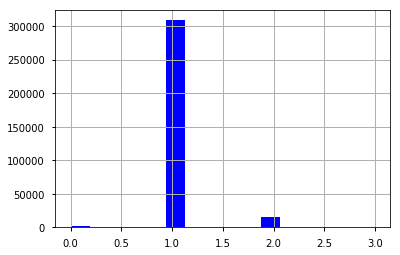

In [95]:
df2["Device"].hist(bins = 16, color = "blue")

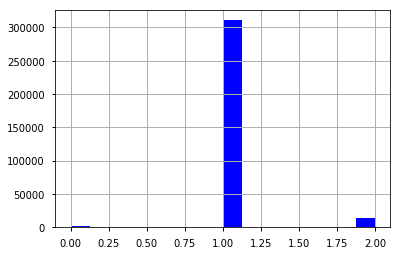

In [96]:
df2["OS"].hist(bins = 16, color = "blue")

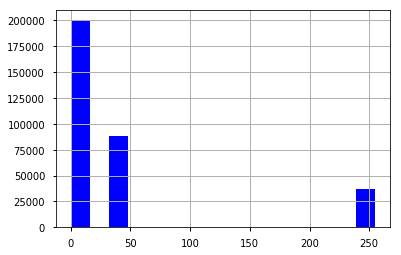

In [97]:
df2["Country"].hist(bins = 16, color = "blue")

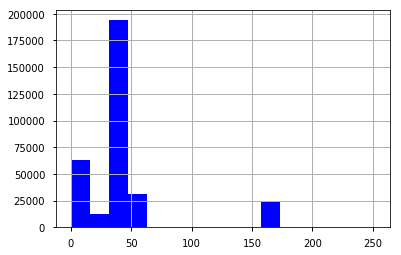

In [98]:
df2["State"].hist(bins = 16, color = "blue")

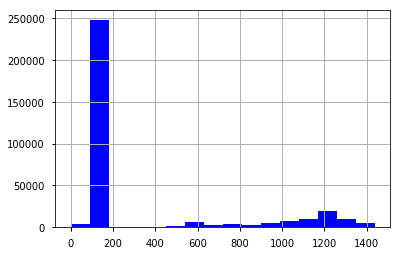

In [99]:
df2["Minute_Of_Day"].hist(bins = 16, color = "blue")

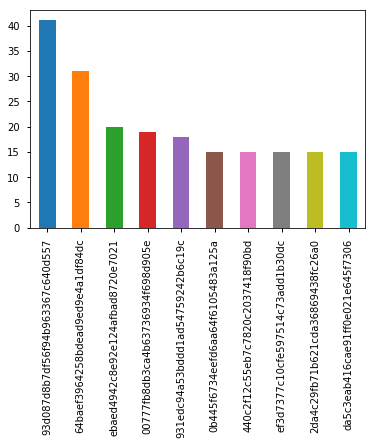

In [100]:
df2["UserId"].value_counts().nlargest(10).plot(kind = "bar")

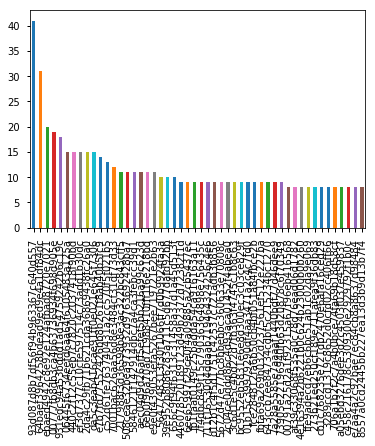

In [101]:
df2["UserId"].value_counts().nlargest(50).plot(kind = "bar")

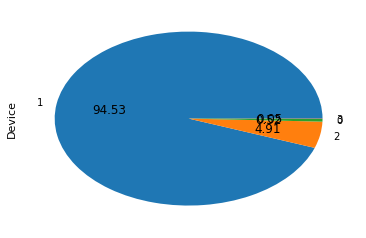

In [102]:
df2["Device"].value_counts().plot.pie(autopct="%.2f")

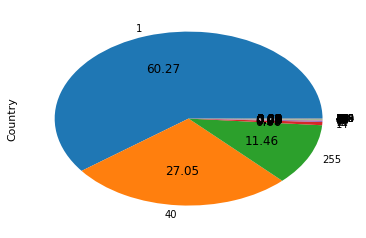

In [103]:
df2["Country"].value_counts().plot.pie(autopct="%.2f")

In [104]:
corr = df2.corr()
corr

,Date,Minute_Of_Day,Second,State,Country,Device,OS
Date,1.000000,0.135697,NaN,0.292886,-0.358086,0.002610,0.129017
Minute_Of_Day,0.135697,1.000000,NaN,0.139466,-0.139869,-0.016532,0.021237
Second,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,0.292886,0.139466,NaN,1.000000,-0.317789,0.012140,0.010918
Country,-0.358086,-0.139869,NaN,-0.317789,1.000000,0.034285,-0.046338
Device,0.002610,-0.016532,NaN,0.012140,0.034285,1.000000,0.174793
OS,0.129017,0.021237,NaN,0.010918,-0.046338,0.174793,1.000000


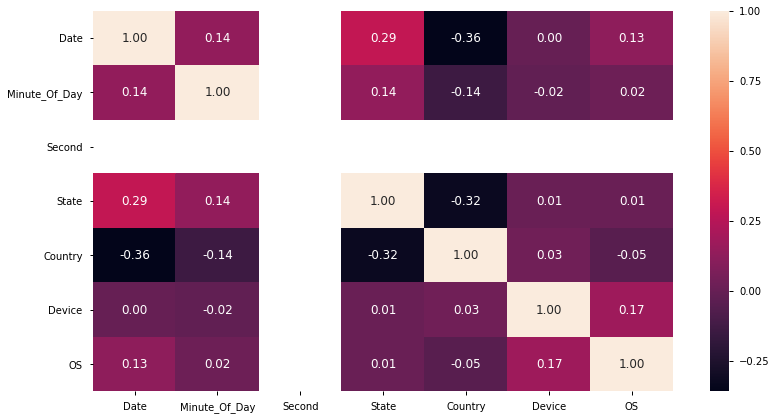

In [105]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

C:\Users\Rajesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


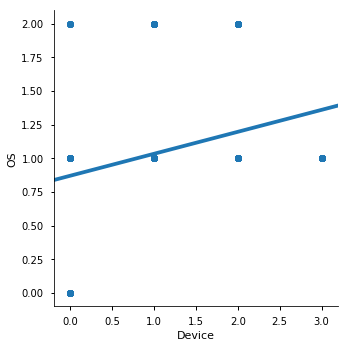

In [111]:
g = sns.lmplot("Device","OS",df2)

C:\Users\Rajesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


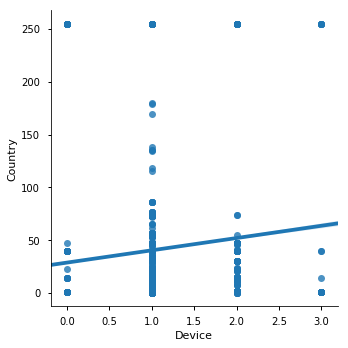

In [107]:
g = sns.lmplot("Device","Country",df2)

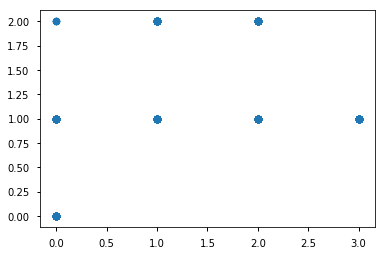

In [108]:
plt.scatter(df2["Device"],df2["OS"])

In [109]:
list(df2)

['UserId',
 'Date',
 'Minute_Of_Day',
 'Second',
 'State',
 'Country',
 'Device',
 'OS',
 'TimeStamp']

In [110]:
df2.head()

,UserId,Date,Minute_Of_Day,Second,State,Country,Device,OS,TimeStamp
0,0d5f4cc176a4e1c648a9b9b5dbe21d69,20170106,0,0,47,1,1,1,2017-01-06 00:00:00
1,807018f66aba113be576eb8afa4ea4b6,20170106,0,0,6,1,1,1,2017-01-06 00:00:00
2,763e66e04918d8b8a7e69a778f5a742a,20170106,1,0,41,1,1,1,2017-01-06 00:01:00
3,4ee1ed456fa04fc42168a9787b54b549,20170106,1,0,37,1,1,1,2017-01-06 00:01:00
4,253e758a5557f9de890e814d901f6906,20170106,6,0,46,40,1,1,2017-01-06 00:06:00
